# PyLemma

This is a simple example of what you can do in Lemma using the python interface

In [5]:
!pip install pyLemma 
!pip install numpy 
!pip install matplotlib

Requirement already up-to-date: pyLemma in /home/tirons/.local/lib/python3.7/site-packages (0.0.6)
  Could not find a version that satisfies the requirement as (from versions: )
No matching distribution found for as


In [2]:
from pyLemma import FDEM1D 
import numpy as np
import matplotlib.pyplot as plt 

wire = FDEM1D.PolygonalWireAntenna()
wire.SetNumberOfPoints(5)
wire.SetPoint(0, (-50,-50,  -1e-3))
wire.SetPoint(1, (-50, 50,  -1e-3))
wire.SetPoint(2, ( 50, 50,  -1e-3))
wire.SetPoint(3, ( 50,-50,  -1e-3))
wire.SetPoint(4, (-50,-50,  -1e-3))
wire.SetNumberOfFrequencies(1)
wire.SetFrequency(0, 100)
#print(wire)

earth = FDEM1D.LayeredEarthEM()
earth.SetNumberOfLayers(3)
earth.SetLayerThickness([100])
earth.SetLayerConductivity([0, 1/100, 1/300])
#print(earth)

points = FDEM1D.FieldPoints()
nx, ny, nz = 101,101,1
ox, oy, oz = -100, -100, -10
dx, dy, dz = 2, 2,20
points.SetNumberOfPoints(nx*ny*nz)
ip = 0
for ix in range(nx):
    for iy in range(ny):
        for iz in range(nz):
            points.SetLocation(ip, [ox+dx*ix, oy+dy*iy, oz+dz*iz])
            ip += 1
#print(points)

## Sets up the parameters for the simulation
* a square sided transmitter of 100 m length
* calculation points on a grid 
* a two layer earth model

In [3]:
em1d = FDEM1D.EMEarth1D()
em1d.AttachFieldPoints(points)
em1d.AttachWireAntenna(wire)
em1d.AttachLayeredEarthEM(earth)
em1d.CalculateWireAntennaFields(True)
#print(em1d)

This block runs the calculation, and can take some time

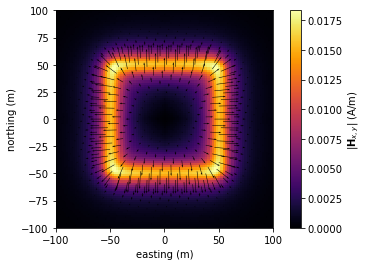

In [4]:
Locs = points.GetLocations()
Efield = points.GetEfield(0)
Hfield = points.GetHfield(0)

#print("Efield", np.shape(Efield))
#print("Locs", np.shape(Locs))
#print(Efield[0])

#plt.plot(Locs[0], Efield[0])
stride = 13

fig = plt.figure()
ax1 = fig.add_subplot(111,aspect='equal')
X,Y = np.meshgrid( np.arange(ox, ox+dx*nx, dx), np.arange(oy, oy+dy*ny, dy) )
im = ax1.pcolormesh( X, Y, np.reshape(np.abs(np.real(Hfield[0]))+np.abs(np.real(Hfield[1])), (nx, ny)), cmap='inferno' )
#im = ax1.contourf( X, Y, np.reshape(np.abs(np.real(Hfield[0]))+np.abs(np.real(Hfield[1])), (nx, ny)), cmap='inferno' )
ax1.quiver(Locs[0,0::stride], Locs[1,0::stride], np.real(Hfield[0,0::stride]), np.real(Hfield[1,0::stride]))
cb = plt.colorbar(im)
cb.ax.set_ylabel("$|\mathbf{H}_{x,y}|$ (A/m)")
ax1.set_xlabel("easting (m)")
ax1.set_ylabel("northing (m)")
#plt.quiver(Locs[0], Locs[1], np.real(Efield[0]), np.real(Efield[1]))
#ax1.quiver(Locs[0],Locs[1],np.imag(Efield[0]), np.imag(Efield[1]), color='blue')


plt.show()

#help(FDEM1D.EMEarth1D)